# ANALYSIS OF EUROPEAN-STYLE CALL AND PUT OPTIONS

In this notebook I show how you can analyse Vanilla European Call and Put Equity options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.equity import *
from financepy.market.curves import *

## Creating the Option

We need to set up the option details - what you would find in the Term Sheet.

In [3]:
expiry_dt = Date(1, 6, 2021)
strike_price = 100.0

We now create the option object

In [4]:
call_option = EquityVanillaOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_CALL)

In [5]:
print(call_option)

OBJECT TYPE: EquityVanillaOption
EXPIRY DATE: 01-JUN-2021
STRIKE PRICE: 100.0
OPTION TYPE VALUE: OptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [6]:
put_option = EquityVanillaOption(expiry_dt, strike_price, OptionTypes.EUROPEAN_PUT)

## Valuation

To do a valuation we need to specify the date and set the market inputs

In [7]:
value_dt = Date(6, 12, 2020)
stock_price = 90.0

In [8]:
interest_rate = 0.02
discount_curve = DiscountCurveFlat(value_dt, interest_rate)

In [9]:
dividend_yield = 0.01
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

The valuation model we use is Black-Scholes which is passed in as a Black-Scholes model object. It is created as follows.

In [10]:
volatility = 0.20
model = BlackScholes(volatility)

The valuation is as follows and the output is in a dictionary

In [11]:
call_option.value(value_dt, stock_price, discount_curve, dividend_curve, model)

np.float64(1.803756380338044)

In [12]:
put_value = put_option.value(value_dt, stock_price, discount_curve, dividend_curve, model)
print("Put Option Value: %12.5f" %put_value)

Put Option Value:     11.27417


### Spot Price Dependency

We can examine how the option value depends on the spot price

In [13]:
stock_prices = np.linspace(60,140,100)
values = call_option.value(value_dt, stock_prices, discount_curve, dividend_curve, model)

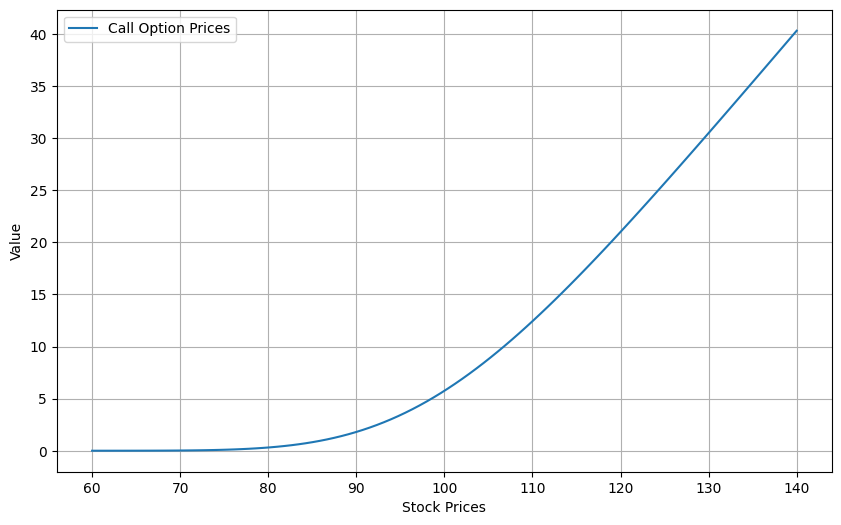

In [14]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices,values, label="Call Option Prices")
plt.xlabel("Stock Prices")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Volatility Dependency

We can see how the value depends on volatility

In [15]:
volatilities = np.linspace(0.01,10,100)
models = BlackScholes(volatilities)
values = call_option.value(value_dt, stock_price, discount_curve, dividend_curve, models)

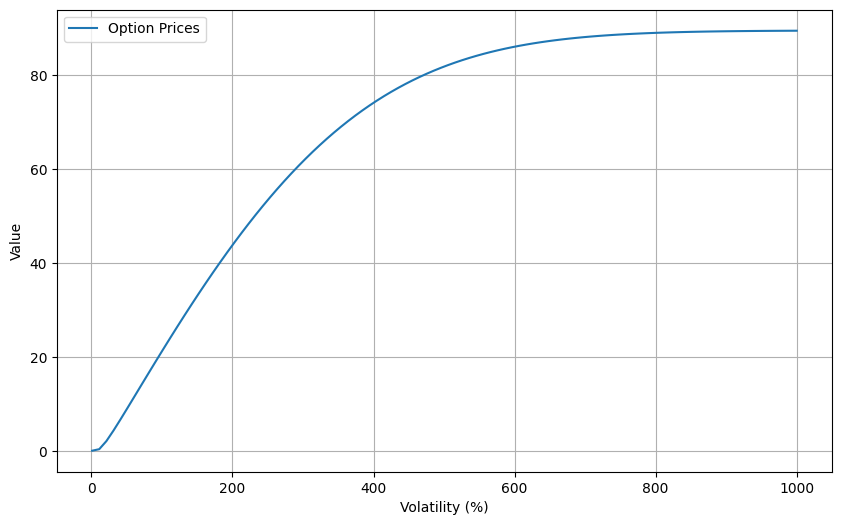

In [16]:
plt.figure(figsize=(10,6))
plt.plot(volatilities*100,values, label="Option Prices")
plt.xlabel("Volatility (%)")
plt.ylabel("Value")
plt.legend()
plt.grid()

### Strike Price Dependency

Also strikes. 

In [17]:
strike_prices = np.linspace(70,130,50)

But as these are part of the option description - so we need to first vectorise those.

In [18]:
call_options = EquityVanillaOption(expiry_dt, strike_prices, OptionTypes.EUROPEAN_CALL)

Look, we have an array of call_options with different strikes

In [19]:
call_options.strike_price

array([ 70.        ,  71.2244898 ,  72.44897959,  73.67346939,
        74.89795918,  76.12244898,  77.34693878,  78.57142857,
        79.79591837,  81.02040816,  82.24489796,  83.46938776,
        84.69387755,  85.91836735,  87.14285714,  88.36734694,
        89.59183673,  90.81632653,  92.04081633,  93.26530612,
        94.48979592,  95.71428571,  96.93877551,  98.16326531,
        99.3877551 , 100.6122449 , 101.83673469, 103.06122449,
       104.28571429, 105.51020408, 106.73469388, 107.95918367,
       109.18367347, 110.40816327, 111.63265306, 112.85714286,
       114.08163265, 115.30612245, 116.53061224, 117.75510204,
       118.97959184, 120.20408163, 121.42857143, 122.65306122,
       123.87755102, 125.10204082, 126.32653061, 127.55102041,
       128.7755102 , 130.        ])

Then we can get back a vector of values

In [20]:
call_values = call_options.value(value_dt, stock_price, discount_curve, dividend_curve, model)

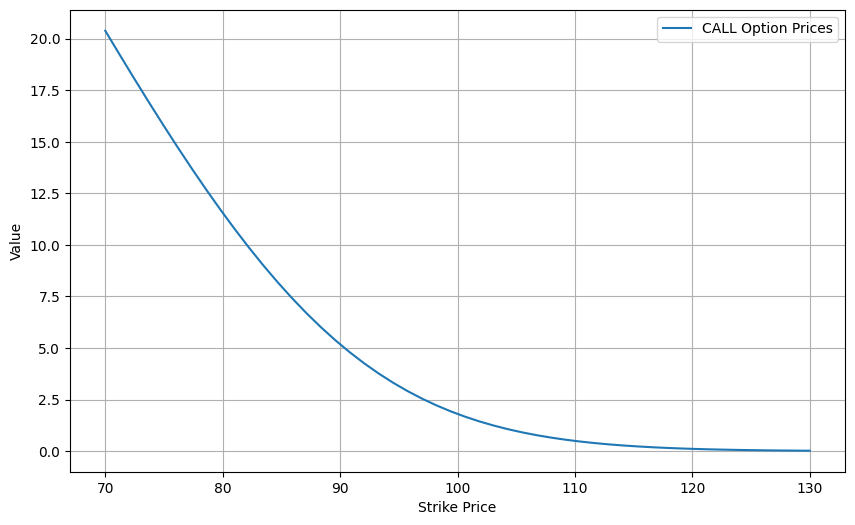

In [21]:
plt.figure(figsize=(10,6))
plt.plot(strike_prices, call_values, label="CALL Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Let's do put options too 

In [22]:
put_options = EquityVanillaOption(expiry_dt, strike_prices, OptionTypes.EUROPEAN_PUT)

In [23]:
put_values = put_options.value(value_dt, stock_price, discount_curve, dividend_curve, model)

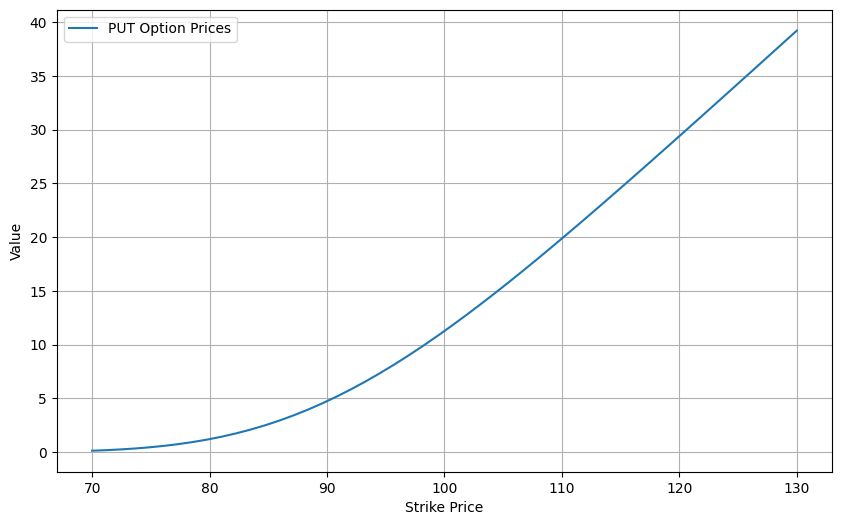

In [24]:
plt.figure(figsize=(10,6))
plt.plot(strike_prices, put_values, label="PUT Option Prices")
plt.xlabel("Strike Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

## Risk Sensitivities

In [25]:
call_deltas = call_option.delta(value_dt, stock_prices, discount_curve, dividend_curve, model)

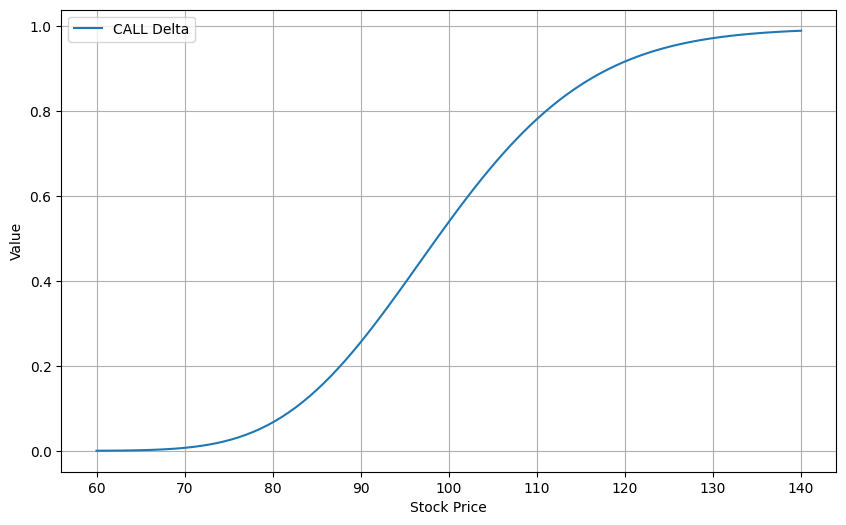

In [26]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, call_deltas, label="CALL Delta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [27]:
callGammas = call_option.gamma(value_dt, stock_prices, discount_curve, dividend_curve, model)

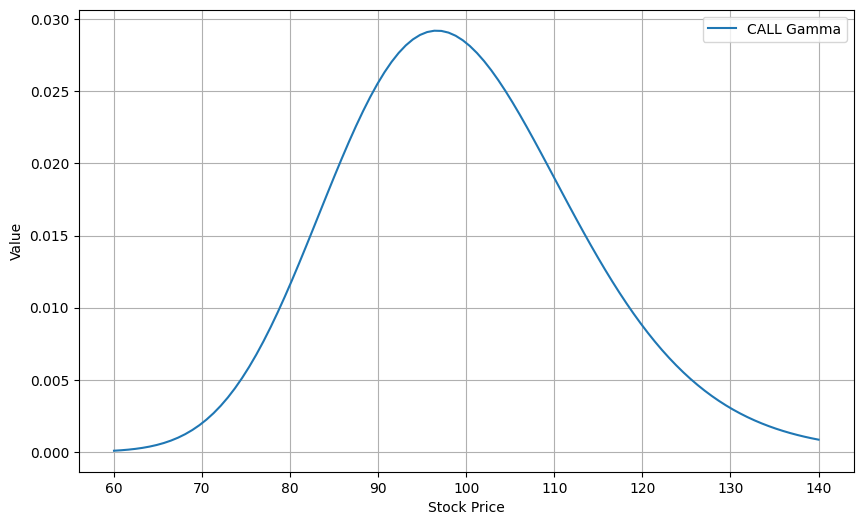

In [28]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callGammas, label="CALL Gamma")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [29]:
callVegas = call_option.vega(value_dt, stock_prices, discount_curve, dividend_curve, model)

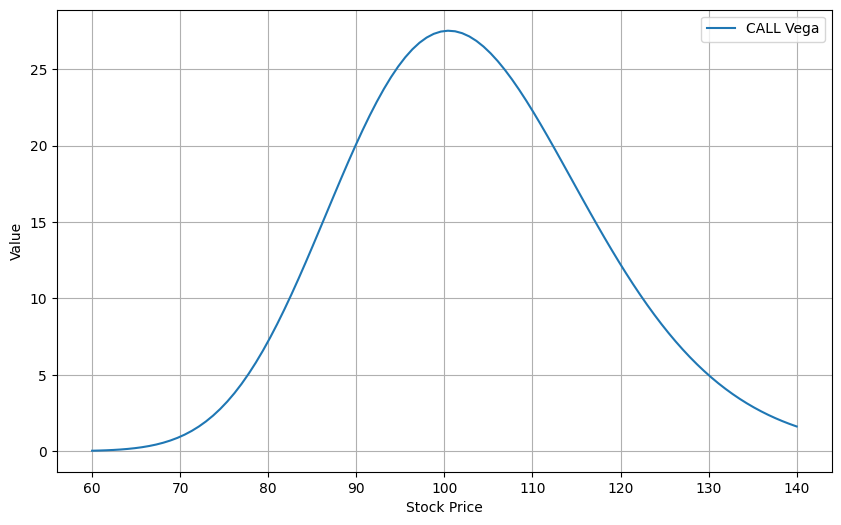

In [30]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callVegas, label="CALL Vega")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

In [31]:
callThetas = call_option.theta(value_dt, stock_prices, discount_curve, dividend_curve, model)

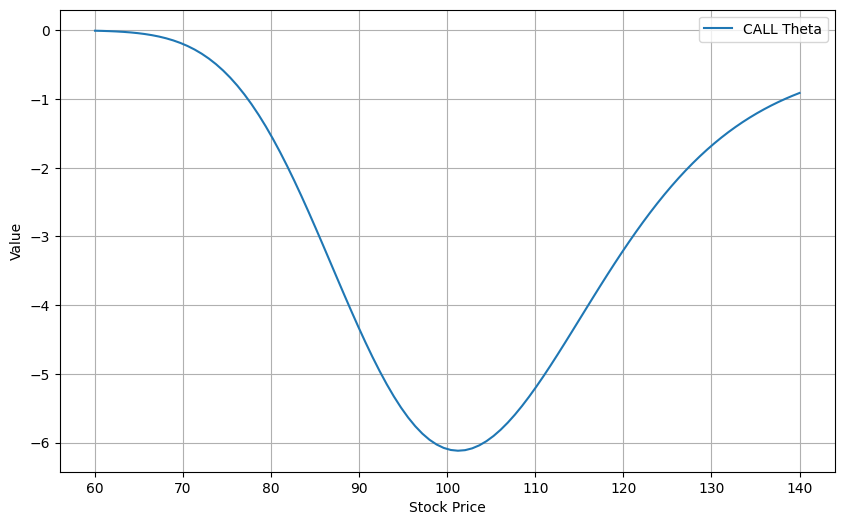

In [32]:
plt.figure(figsize=(10,6))
plt.plot(stock_prices, callThetas, label="CALL Theta")
plt.xlabel("Stock Price")
plt.ylabel("Value")
plt.legend()
plt.grid()

Copyright (c) 2019, Dominic O'Kane 